# Factors affecting Loan status and their effects Loan interest
## by Okoneyo Etieneobong Peter

## Investigation Overview

> The aim of this investigation, is to find ou how variuos features affect loan status, and borrowers rate in relation to income range.

## Dataset Overview

> The data consists of 16 variables which originally had 81 variables but were cleaned due to irrelevant information, missing values and tidiness of the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# subsetting the data to select features of interest
features = ['ListingKey','ListingCreationDate','EmploymentStatus','EmploymentStatusDuration','Occupation',
           'ProsperScore','BorrowerRate','IncomeRange','Term','DebtToIncomeRatio','MonthlyLoanPayment',
            'StatedMonthlyIncome','LoanOriginalAmount','BorrowerState',
            'ListingCategory (numeric)','LoanStatus']
loan = loan[features]

In [4]:
loan.loc[:,'ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])
loan.loc[:,'ListingCreationYear'] = loan.loc[:,'ListingCreationDate'].dt.year

In [5]:
def drop_row_col(dframe, row_col, axis=1):
    dframe.drop(row_col, axis=axis,inplace = True)
    
yr_idx = loan.query('ListingCreationYear == 2005').index
drop_row_col(loan,yr_idx, axis=0)

In [6]:
columns =  ['ListingCreationDate','ListingCategory (numeric)']
drop_row_col(loan,columns,axis = 1)

In [7]:
# drop duplicates
loan.drop_duplicates(subset=['ListingKey'], inplace = True)
print(loan.duplicated(subset=['ListingKey']).sum())

0


In [8]:
# drop null values
columns = ['EmploymentStatus', 'EmploymentStatusDuration', 'Occupation','ProsperScore','BorrowerState']
loan.dropna(axis = 0,subset = columns , inplace = True)

In [9]:
sc_idx = loan.query('ProsperScore == 11').index
drop_row_col(loan,sc_idx, axis=0)

In [10]:
# converting pscores to categorical variable
scores = np.arange(1,11)
pscores = pd.api.types.CategoricalDtype(ordered=True, categories=scores)
loan['ProsperScore'] = loan['ProsperScore'].astype(pscores);

In [11]:
# creating a dictionary
past ={'Current':'Completed','Completed':'Completed','Chargedoff':'Defaulted',
       'Defaulted':'Defaulted','FinalPaymentInProgress':'Completed',
       'Past Due (1-15 days)':'Defaulted','Past Due (31-60 days)':'Defaulted',
       'Past Due (61-90 days)':'Defaulted','Past Due (91-120 days)':'Defaulted',
       'Past Due (16-30 days)':'Defaulted','Past Due (>120 days)':'Defaulted'}
loan['LoanStatus'] = loan['LoanStatus'].map(past)

## (Visualization 1)

In the Visualization below,We see that there are loans with a prosper score of 1 (high risk) to those with a prosper score of 10(very low risk). It can be seen that high risk loans have a larger proportion of defaulters than the rest of them as about 50% of these loans were defaulted.

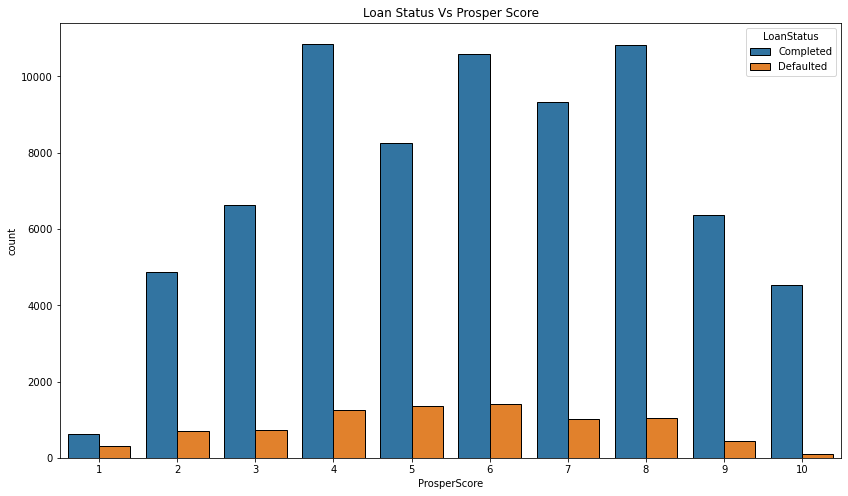

In [12]:
#plot the bar chachart
plt.figure(figsize = [14, 8]) 
sb.countplot(data = loan, x = 'ProsperScore', hue = 'LoanStatus', edgecolor = 'black');
plt.title('Loan Status Vs Prosper Score');

## (Visualization 2)

This visualization looks at how loan status varies with Borrowers rate and prosper score for the various years,Borrowers rate decreases as prosper score increases in both completed and defaulted status for all years, In the year 2014, there is a large amount of defaulted status with a small prosper score and high borrowers rate. Borrowers rate is small for low risk loans and high for high risk loans.

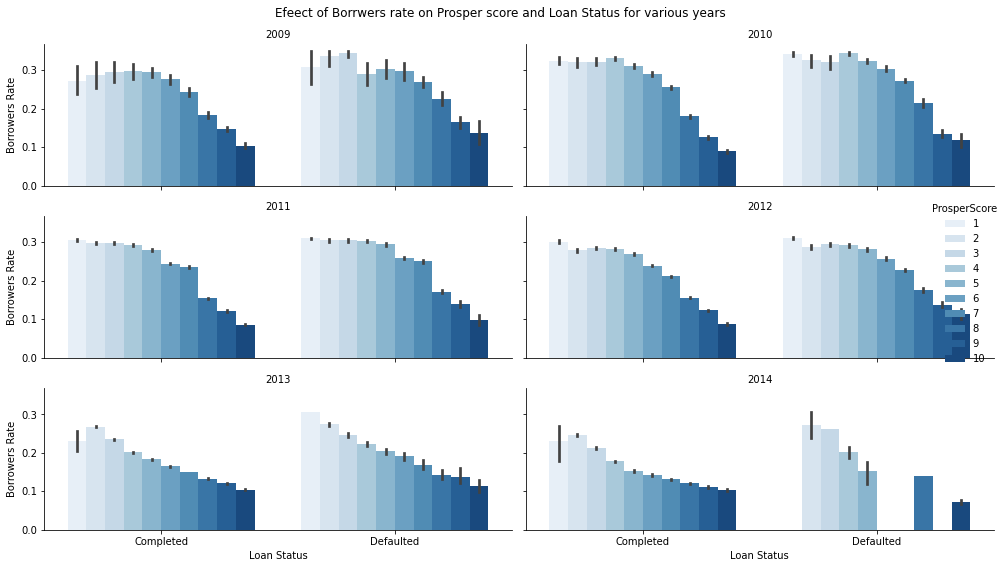

In [13]:
g = sb.catplot(x='LoanStatus',y='BorrowerRate', col = "ListingCreationYear",
               hue = "ProsperScore",data = loan, kind = "bar",col_wrap = 2,palette ="Blues", aspect = 1);
(g.set_axis_labels("Loan Status","Borrowers Rate")
 .set_titles("{col_name}"));
g.fig.set_size_inches(14,8)
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle("Efeect of Borrwers rate on Prosper score and Loan Status for various years");
plt.tight_layout()

## (Visualization 3)

This plot shows that borrowers rate decreases with increasing income ranges, the interest given for each loan decreases with the clients income range, for clients with high income range, the interest rate is small compared with clients of low income range.This is done to encourage low income earners to collect loans for the expansion of their businesses. This is so for all years, although in 2014, there is no data for umployed and people with low income status.

In [14]:
# convert income range into categorical types
ordinal_var = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','Not employed','$0']
ordered = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered)

In [15]:
loan['IncomeRange'].value_counts()

$50,000-74,999    24654
$25,000-49,999    23220
$100,000+         14385
$75,000-99,999    13969
$1-24,999          4362
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

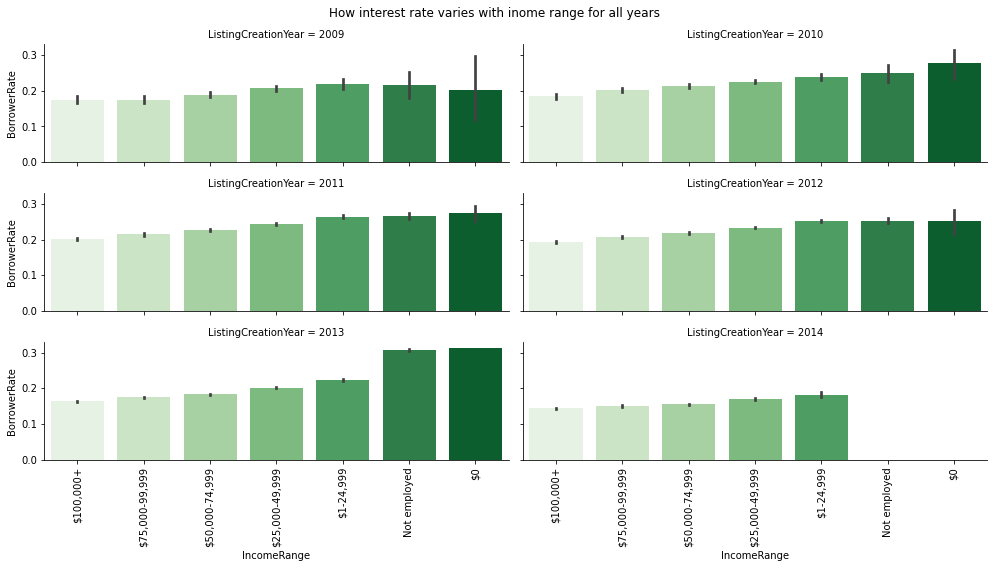

In [16]:
g = sb.catplot(x='IncomeRange',y='BorrowerRate', col = "ListingCreationYear",
               data = loan, kind = "bar",col_wrap = 2,palette ="Greens", aspect = 1);
g.set_xticklabels(rotation = 90);
g.fig.set_size_inches(14,8)
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle("How interest rate varies with inome range for all years");
plt.tight_layout()

## Visualization 4
Futhermore, although its not within the scope of this investigation,ill like to provide insight on occupation.<br>
Occupations that has the highest number of loans taken are proffesionals, sales people and executives. This is due to the fact that these sets of people are more involved in investments,project an denerating profits, therfore, they need more money to handle their affairs.<br>
The <span style = 'color:red'>'other'</span> variable is not taken into consideration as that comprises of many occupations in one.

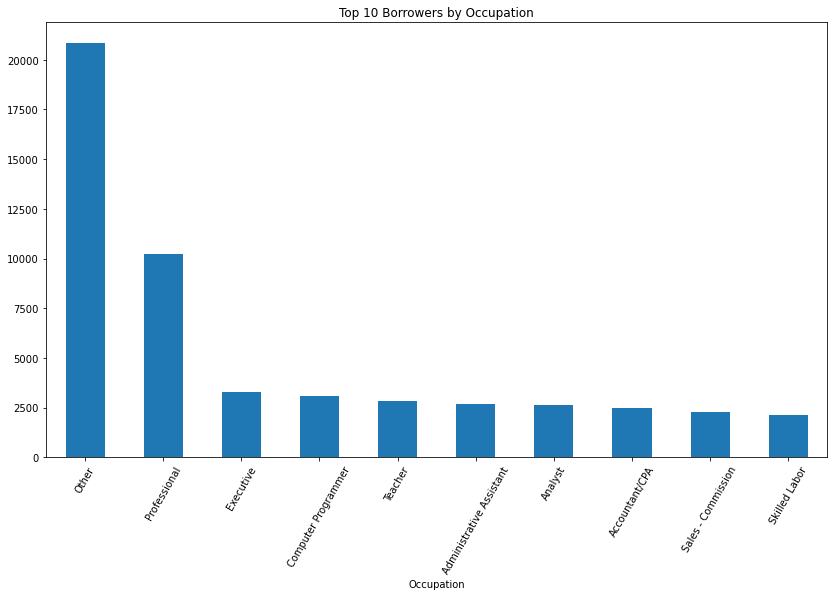

In [17]:
#plotting the bar chart
plt.figure(figsize = (14,8))
loan['Occupation'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar')
plt.xticks(rotation = 60)
plt.xlabel('Occupation')
plt.title('Top 10 Borrowers by Occupation');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt